In [1]:
import sys, os

# Add project_root to sys.path so Python can find `scripts/`
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.pipelines import change_model
from scripts.predict import future_change_prediction
from scripts.lstm import LSTMModel
from scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
scaler = StandardScaler()
model_type = LSTMModel
criterion = CustomizedLoss()
tuning = False

In [4]:
# 📂 Load dataset
file_path_1 = "../ready_data/change_vn_index.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1)

60
(448, 60, 5)
torch.Size([447, 60, 5])
Epoch 1 - Loss: 80.82647596299648
Epoch 2 - Loss: 80.47271948494017
Epoch 3 - Loss: 80.3881821371615
Epoch 4 - Loss: 80.34849223401397
Epoch 5 - Loss: 80.3097828142345
Epoch 6 - Loss: 80.25568935833871
Epoch 7 - Loss: 80.27014061063528
Epoch 8 - Loss: 80.24675979325548
Epoch 9 - Loss: 80.25508912000805
Epoch 10 - Loss: 80.19126312294975
Epoch 11 - Loss: 80.22669252939522
Epoch 12 - Loss: 80.18660569889471
Epoch 13 - Loss: 80.1648778822273
Epoch 14 - Loss: 80.17630732990801
Epoch 15 - Loss: 80.19781628390774
Epoch 16 - Loss: 80.17073491727933
Epoch 17 - Loss: 80.16880241129547
Epoch 18 - Loss: 80.12262939661741
Epoch 19 - Loss: 80.12339016748592
Epoch 20 - Loss: 80.08501859288663
Epoch 21 - Loss: 80.1189979868941
Epoch 22 - Loss: 80.03288531396538
Epoch 23 - Loss: 80.00352924829349
Epoch 24 - Loss: 79.96307348739356
Epoch 25 - Loss: 79.80959302326664
Epoch 26 - Loss: 79.77850492903963
Epoch 27 - Loss: 79.74062339868397
Epoch 28 - Loss: 79.7285393

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


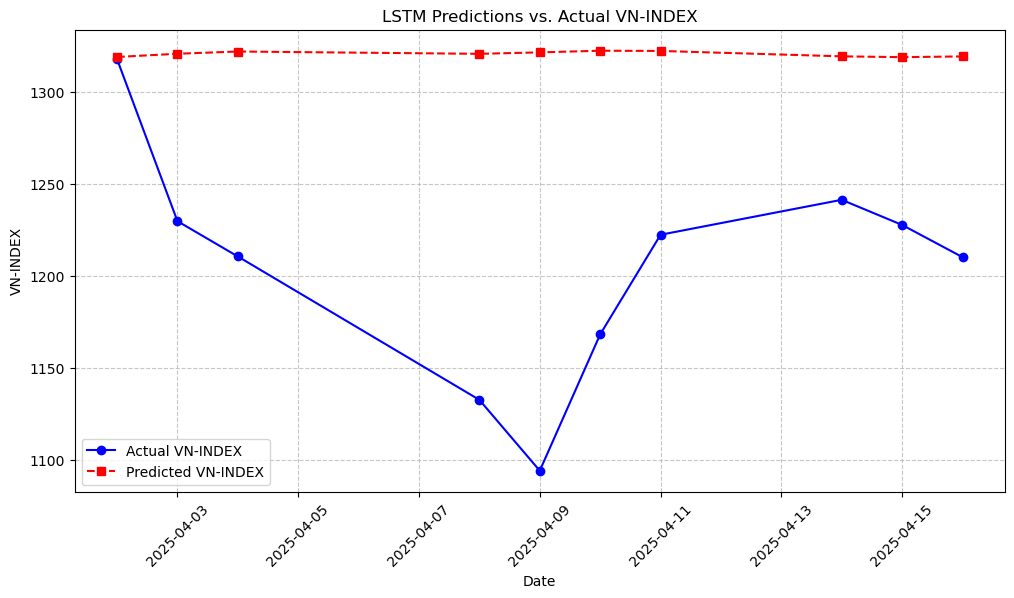

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-04-02          1317.83         1319.008315
1 2025-04-03          1229.84         1320.763526
2 2025-04-04          1210.67         1321.982775
3 2025-04-08          1132.79         1320.725388
4 2025-04-09          1094.30         1321.511141
5 2025-04-10          1168.34         1322.408090
6 2025-04-11          1222.46         1322.288747
7 2025-04-14          1241.44         1319.360130
8 2025-04-15          1227.79         1318.906650
9 2025-04-16          1210.30         1319.316429
Epoch 1 - Loss: 82.26651282096282
Epoch 2 - Loss: 82.16549059888348
Epoch 3 - Loss: 82.10972057469189
Epoch 4 - Loss: 82.08543214807287
Epoch 5 - Loss: 82.0317024672404
Epoch 6 - Loss: 82.02884575212374
Epoch 7 - Loss: 82.01098380424082
Epoch 8 - Loss: 82.00782363442704
Epoch 9 - Loss: 81.97748438687995
Epoch 10 - Loss: 81.9828836726956
Epoch 11 - Loss: 81.93857659073547
Epoch 12 - Loss: 81.95388519158587

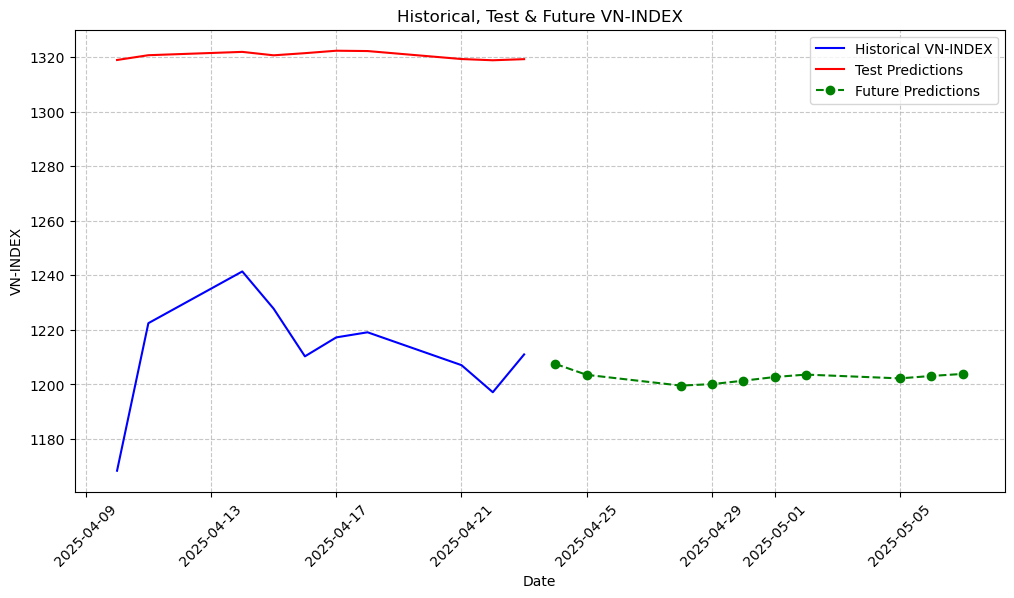

        Date  Predicted VN-INDEX  Predicted Change
0 2025-04-24         1207.506730         -0.002885
1 2025-04-25         1203.513830         -0.003307
2 2025-04-28         1199.570618         -0.003276
3 2025-04-29         1200.104863          0.000445
4 2025-04-30         1201.359041          0.001045
5 2025-05-01         1202.712656          0.001127
6 2025-05-02         1203.602859          0.000740
7 2025-05-05         1202.212594         -0.001155
8 2025-05-06         1203.099200          0.000737
9 2025-05-07         1203.845910          0.000621


In [5]:
# 📊 Select only VN-INDEX for prediction
data = df_1[["Change", 'dow_sin', 'dow_cos',
        'month_sin', 'month_cos']]

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_1)

60
(448, 60, 12)
torch.Size([447, 60, 12])
Epoch 1 - Loss: 80.46069140173495
Epoch 2 - Loss: 80.38343632640317
Epoch 3 - Loss: 80.32808057079092
Epoch 4 - Loss: 80.2128494400531
Epoch 5 - Loss: 80.18117297859862
Epoch 6 - Loss: 80.13582323957235
Epoch 7 - Loss: 80.05901669990271
Epoch 8 - Loss: 80.02776707522571
Epoch 9 - Loss: 79.9243595302105
Epoch 10 - Loss: 79.8856593859382
Epoch 11 - Loss: 79.8667131587863
Epoch 12 - Loss: 79.74712968012318
Epoch 13 - Loss: 79.72859993902966
Epoch 14 - Loss: 79.60580988135189
Epoch 15 - Loss: 79.54803882027045
Epoch 16 - Loss: 79.49244073079899
Epoch 17 - Loss: 79.4098996212706
Epoch 18 - Loss: 79.38229305064306
Epoch 19 - Loss: 79.2489277892746
Epoch 20 - Loss: 79.1710181874223
Epoch 21 - Loss: 79.12259192485362
Epoch 22 - Loss: 78.94631137745455
Epoch 23 - Loss: 78.95887749549001
Epoch 24 - Loss: 78.71107513830066
Epoch 25 - Loss: 78.61979208840057
Epoch 26 - Loss: 78.61296418821439
Epoch 27 - Loss: 78.5264530647546
Epoch 28 - Loss: 78.430459695

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


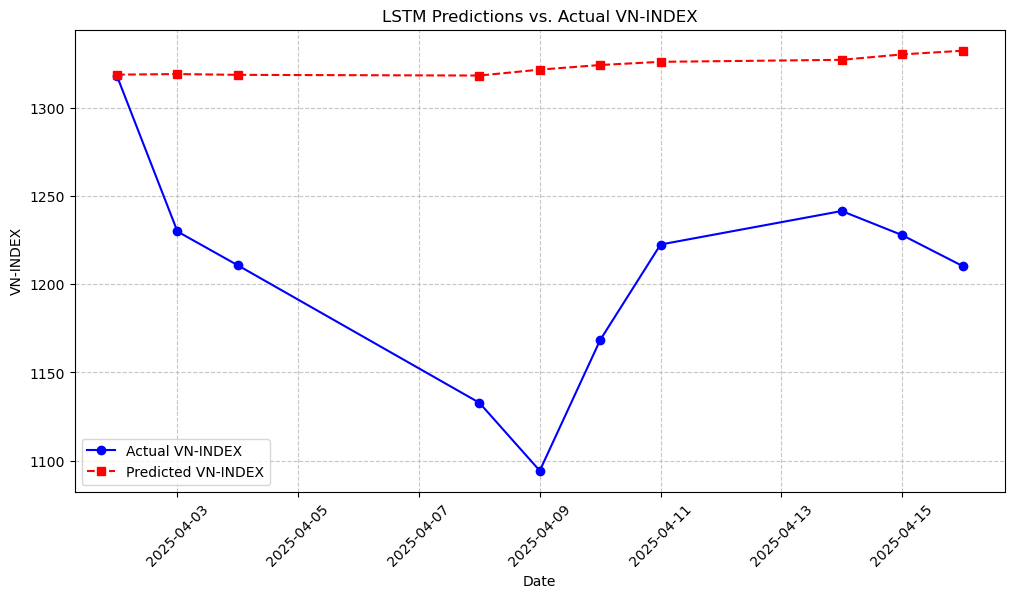

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-04-02          1317.83         1318.698028
1 2025-04-03          1229.84         1319.024729
2 2025-04-04          1210.67         1318.582907
3 2025-04-08          1132.79         1318.181595
4 2025-04-09          1094.30         1321.534884
5 2025-04-10          1168.34         1324.155874
6 2025-04-11          1222.46         1325.958139
7 2025-04-14          1241.44         1327.095931
8 2025-04-15          1227.79         1330.161278
9 2025-04-16          1210.30         1332.248747
Epoch 1 - Loss: 82.12249792460352
Epoch 2 - Loss: 82.06369072943926
Epoch 3 - Loss: 81.99479756550863
Epoch 4 - Loss: 81.96018745936453
Epoch 5 - Loss: 81.92209369316697
Epoch 6 - Loss: 81.8449318157509
Epoch 7 - Loss: 81.80031312163919
Epoch 8 - Loss: 81.74951636092737
Epoch 9 - Loss: 81.71819952689111
Epoch 10 - Loss: 81.6234694304876
Epoch 11 - Loss: 81.62088781502098
Epoch 12 - Loss: 81.52552873501554

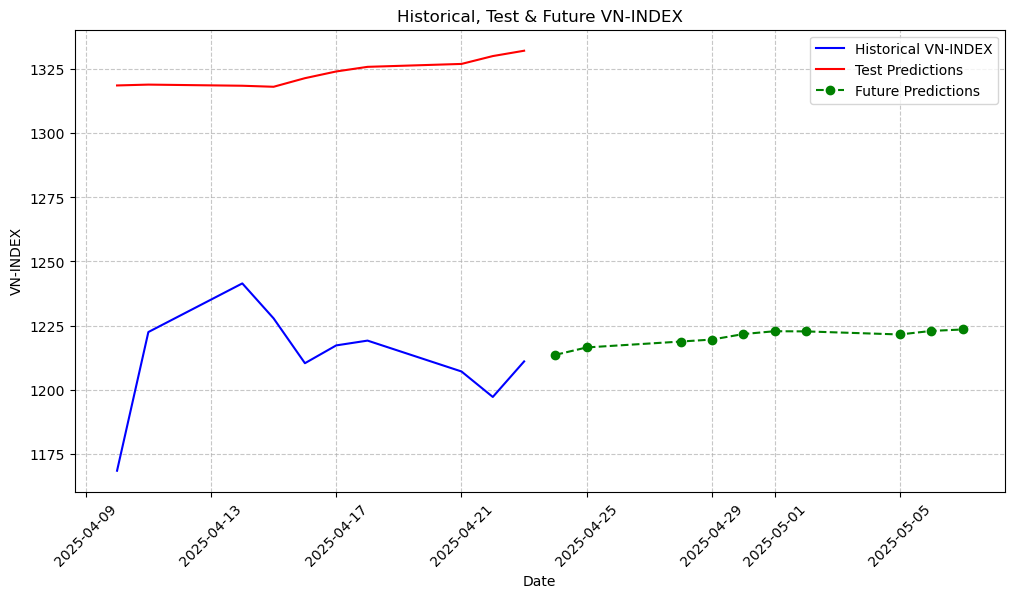

        Date  Predicted VN-INDEX  Predicted Change
0 2025-04-24         1213.570878          0.002123
1 2025-04-25         1216.457497          0.002379
2 2025-04-28         1218.750609          0.001885
3 2025-04-29         1219.530196          0.000640
4 2025-04-30         1221.672883          0.001757
5 2025-05-01         1222.783238          0.000909
6 2025-05-02         1222.713420         -0.000057
7 2025-05-05         1221.515149         -0.000980
8 2025-05-06         1222.891998          0.001127
9 2025-05-07         1223.463147          0.000467


In [6]:
# 📊 Select additional VN-INDEX statistics for prediction
data = df_1

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_1)

60
(446, 60, 20)
torch.Size([445, 60, 20])
Epoch 1 - Loss: 79.6591470213607
Epoch 2 - Loss: 79.44083978747949
Epoch 3 - Loss: 79.28445850219578
Epoch 4 - Loss: 79.08854899648577
Epoch 5 - Loss: 78.87451017135754
Epoch 6 - Loss: 78.62262686574832
Epoch 7 - Loss: 78.27617851411924
Epoch 8 - Loss: 77.82805245928466
Epoch 9 - Loss: 77.15296851703897
Epoch 10 - Loss: 76.75893561681733
Epoch 11 - Loss: 76.27947556134313
Epoch 12 - Loss: 75.93406860996038
Epoch 13 - Loss: 75.05705727729946
Epoch 14 - Loss: 74.4575692745857
Epoch 15 - Loss: 73.68765929713845
Epoch 16 - Loss: 73.26876792497933
Epoch 17 - Loss: 73.16276561934501
Epoch 18 - Loss: 72.51466497825459
Epoch 19 - Loss: 72.1390714677982
Epoch 20 - Loss: 71.70906147547066
Epoch 21 - Loss: 72.2837287420407
Epoch 22 - Loss: 71.0374471321702
Epoch 23 - Loss: 70.25605417927727
Epoch 24 - Loss: 70.18474323302507
Epoch 25 - Loss: 71.18714204756543
Epoch 26 - Loss: 70.49500730680302
Epoch 27 - Loss: 69.16005255514756
Epoch 28 - Loss: 68.955659

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


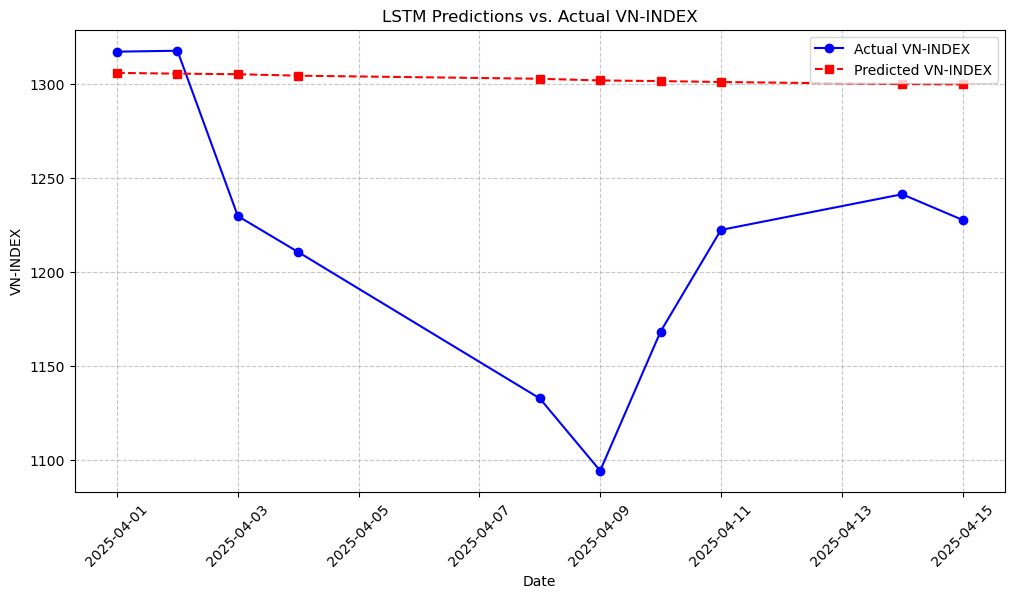

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-04-01          1317.33         1306.033812
1 2025-04-02          1317.83         1305.627237
2 2025-04-03          1229.84         1305.335576
3 2025-04-04          1210.67         1304.545689
4 2025-04-08          1132.79         1302.913139
5 2025-04-09          1094.30         1302.009593
6 2025-04-10          1168.34         1301.667331
7 2025-04-11          1222.46         1301.187580
8 2025-04-14          1241.44         1300.079226
9 2025-04-15          1227.79         1299.910695
Epoch 1 - Loss: 81.36625850992277
Epoch 2 - Loss: 81.19926399132237
Epoch 3 - Loss: 81.08509866939858
Epoch 4 - Loss: 80.94075124477968
Epoch 5 - Loss: 80.77620990900323
Epoch 6 - Loss: 80.64055525371805
Epoch 7 - Loss: 80.49486140906811
Epoch 8 - Loss: 80.17932915315032
Epoch 9 - Loss: 79.6740791699849
Epoch 10 - Loss: 79.18434083508328
Epoch 11 - Loss: 78.49278638418764
Epoch 12 - Loss: 77.8200994515791

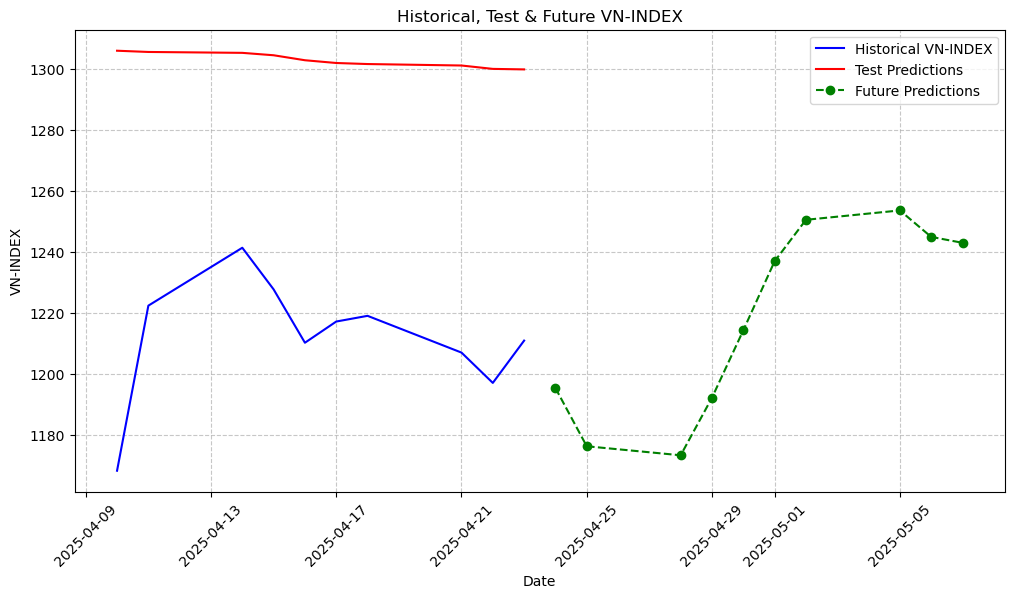

        Date  Predicted VN-INDEX  Predicted Change
0 2025-04-24         1195.445814         -0.012844
1 2025-04-25         1176.357915         -0.015967
2 2025-04-28         1173.403636         -0.002511
3 2025-04-29         1192.282422          0.016089
4 2025-04-30         1214.378544          0.018533
5 2025-05-01         1237.011468          0.018637
6 2025-05-02         1250.602584          0.010987
7 2025-05-05         1253.673606          0.002456
8 2025-05-06         1245.000728         -0.006918
9 2025-05-07         1243.061914         -0.001557


In [7]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1[["Change", 'dow_sin', 'dow_cos',
        'month_sin', 'month_cos']], ['Change'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_1)

60
(446, 60, 27)
torch.Size([445, 60, 27])
Epoch 1 - Loss: 79.54956933716312
Epoch 2 - Loss: 79.32200592849404
Epoch 3 - Loss: 79.1430012001656
Epoch 4 - Loss: 78.95690044015646
Epoch 5 - Loss: 78.6706007043831
Epoch 6 - Loss: 78.25471369363368
Epoch 7 - Loss: 77.8926096255891
Epoch 8 - Loss: 77.36831744480878
Epoch 9 - Loss: 76.75990098249167
Epoch 10 - Loss: 76.1111211469397
Epoch 11 - Loss: 75.52433493640274
Epoch 12 - Loss: 74.81683981558308
Epoch 13 - Loss: 74.41088642412797
Epoch 14 - Loss: 74.16607519378886
Epoch 15 - Loss: 73.94920485746115
Epoch 16 - Loss: 73.46048346208408
Epoch 17 - Loss: 73.48433077475056
Epoch 18 - Loss: 72.1031163376756
Epoch 19 - Loss: 71.4702698723413
Epoch 20 - Loss: 71.14020203566179
Epoch 21 - Loss: 71.77578378189355
Epoch 22 - Loss: 70.8087290301919
Epoch 23 - Loss: 69.85097880940884
Epoch 24 - Loss: 70.01657488383353
Epoch 25 - Loss: 68.60294244159013
Epoch 26 - Loss: 68.60994763253257
Epoch 27 - Loss: 68.61364797921851
Epoch 28 - Loss: 68.46476469

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


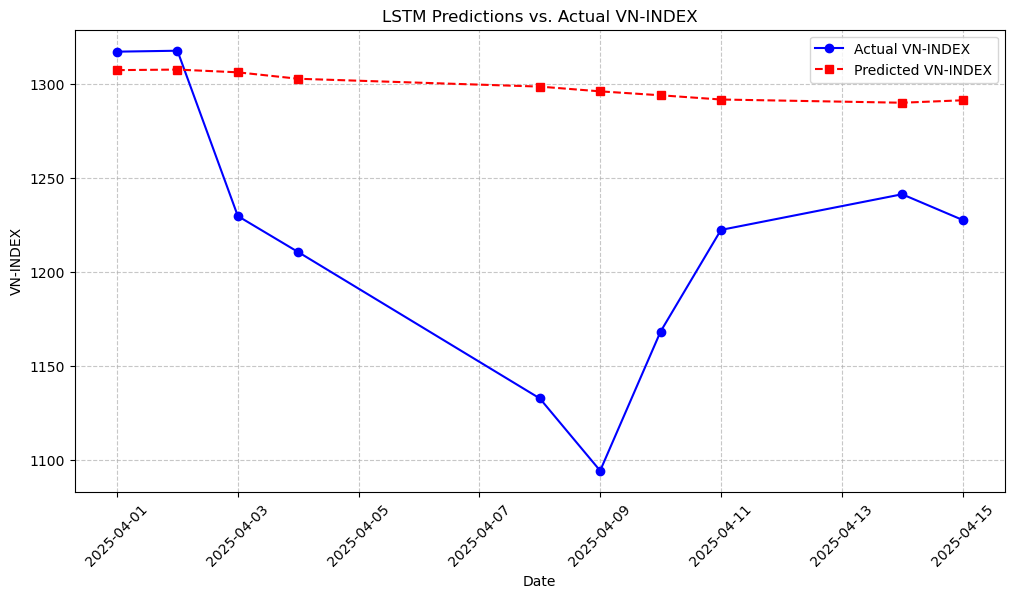

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-04-01          1317.33         1307.503331
1 2025-04-02          1317.83         1307.797113
2 2025-04-03          1229.84         1306.336622
3 2025-04-04          1210.67         1302.906099
4 2025-04-08          1132.79         1298.738129
5 2025-04-09          1094.30         1296.205591
6 2025-04-10          1168.34         1294.116575
7 2025-04-11          1222.46         1291.866528
8 2025-04-14          1241.44         1290.153230
9 2025-04-15          1227.79         1291.451737
Epoch 1 - Loss: 81.31361218169332
Epoch 2 - Loss: 81.16333104344085
Epoch 3 - Loss: 80.95958311203867
Epoch 4 - Loss: 80.79022453166544
Epoch 5 - Loss: 80.43385135987774
Epoch 6 - Loss: 80.09123213496059
Epoch 7 - Loss: 79.6472929068841
Epoch 8 - Loss: 79.07322235684842
Epoch 9 - Loss: 78.57455445919186
Epoch 10 - Loss: 78.07439077226445
Epoch 11 - Loss: 77.36842321092263
Epoch 12 - Loss: 76.7940648766234

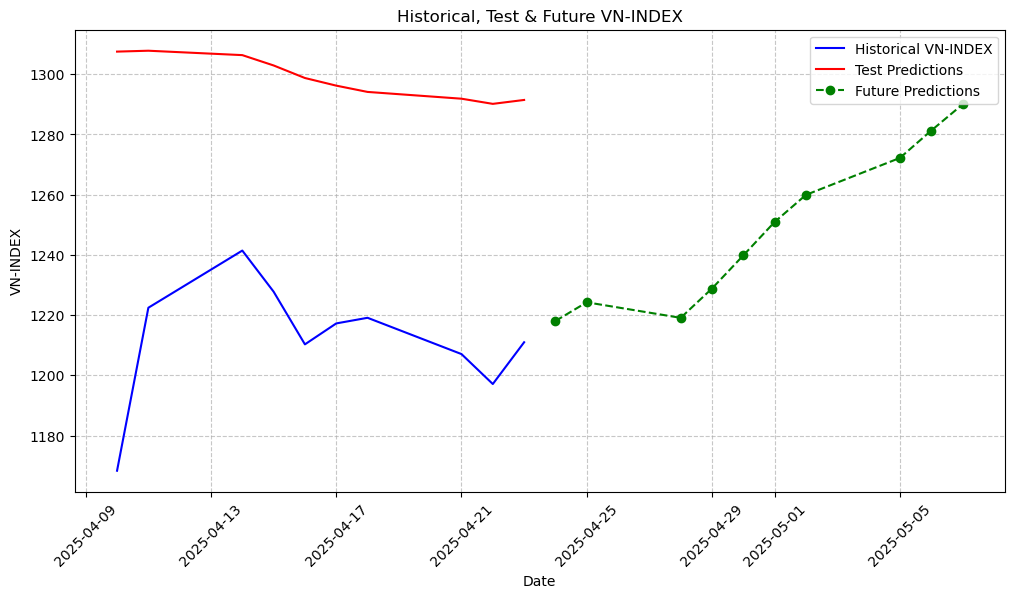

        Date  Predicted VN-INDEX  Predicted Change
0 2025-04-24         1218.059078          0.005829
1 2025-04-25         1224.265680          0.005095
2 2025-04-28         1219.102294         -0.004218
3 2025-04-29         1228.839971          0.007988
4 2025-04-30         1239.833810          0.008947
5 2025-05-01         1250.933475          0.008953
6 2025-05-02         1259.931847          0.007193
7 2025-05-05         1272.195263          0.009733
8 2025-05-06         1281.262883          0.007128
9 2025-05-07         1289.954860          0.006784


In [8]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, ['Change'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_1)

/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_EMA_26'] = copy_df[col].ewm(span=26, adjust=False).mean()
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_MACD'] = copy_df[f'{col}_EMA_12'] - copy_df[f'{col}_EMA_26']
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:66: PerformanceWarning: DataFrame is highly fragment

60
(446, 60, 132)
torch.Size([445, 60, 132])
Epoch 1 - Loss: 79.8152338466607
Epoch 2 - Loss: 79.3038263162598
Epoch 3 - Loss: 78.8051924048923
Epoch 4 - Loss: 78.42696841992438
Epoch 5 - Loss: 77.94401596160606
Epoch 6 - Loss: 77.18100021081045
Epoch 7 - Loss: 76.44192088441923
Epoch 8 - Loss: 75.21365776797757
Epoch 9 - Loss: 74.4392793555744
Epoch 10 - Loss: 73.48660230636597
Epoch 11 - Loss: 72.19122875016183
Epoch 12 - Loss: 71.11825363803655
Epoch 13 - Loss: 70.62064110999927
Epoch 14 - Loss: 69.3125076200813
Epoch 15 - Loss: 68.75499869789928
Epoch 16 - Loss: 68.00348885264248
Epoch 17 - Loss: 67.45438919588923
Epoch 18 - Loss: 65.70529605261981
Epoch 19 - Loss: 66.54489858169109
Epoch 20 - Loss: 65.42069713724777
Epoch 21 - Loss: 64.1191077157855
Epoch 22 - Loss: 63.857691148296
Epoch 23 - Loss: 63.09450628422201
Epoch 24 - Loss: 63.383882963098586
Epoch 25 - Loss: 61.803188000340015
Epoch 26 - Loss: 62.55642881244421
Epoch 27 - Loss: 61.112452739384025
Epoch 28 - Loss: 61.3492

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


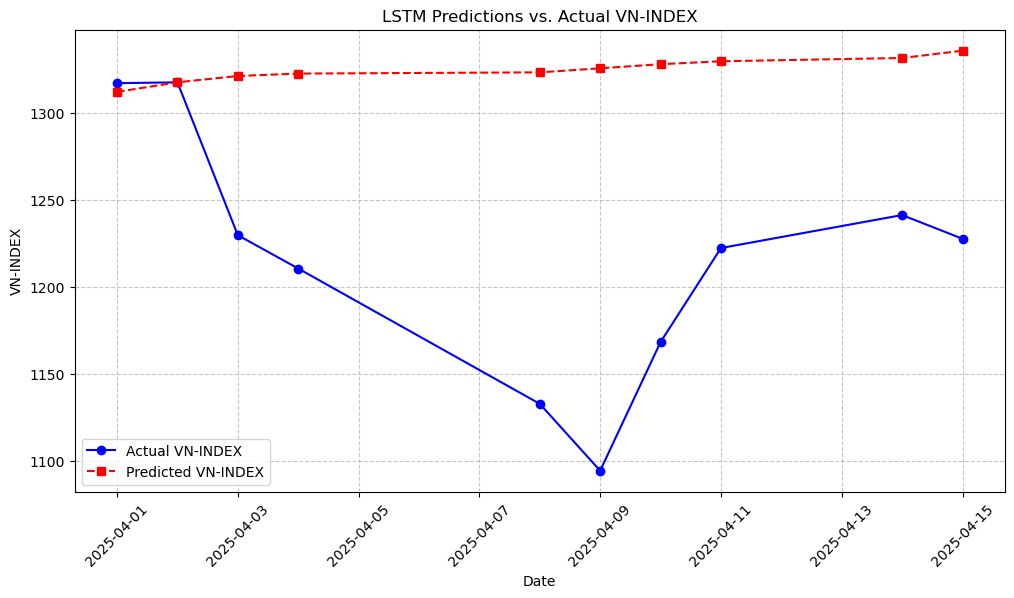

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-04-01          1317.33         1312.314556
1 2025-04-02          1317.83         1317.834344
2 2025-04-03          1229.84         1321.470991
3 2025-04-04          1210.67         1322.854368
4 2025-04-08          1132.79         1323.564189
5 2025-04-09          1094.30         1325.875787
6 2025-04-10          1168.34         1328.264117
7 2025-04-11          1222.46         1329.941805
8 2025-04-14          1241.44         1331.828802
9 2025-04-15          1227.79         1336.009666
Epoch 1 - Loss: 81.45498719904572
Epoch 2 - Loss: 81.00027834344655
Epoch 3 - Loss: 80.54090217547491
Epoch 4 - Loss: 80.12901908904314
Epoch 5 - Loss: 79.44477575924248
Epoch 6 - Loss: 78.65897870576009
Epoch 7 - Loss: 77.64825974265113
Epoch 8 - Loss: 76.46544679347426
Epoch 9 - Loss: 75.86833123257384
Epoch 10 - Loss: 74.47313172696158
Epoch 11 - Loss: 73.96783643215895
Epoch 12 - Loss: 72.667963880114

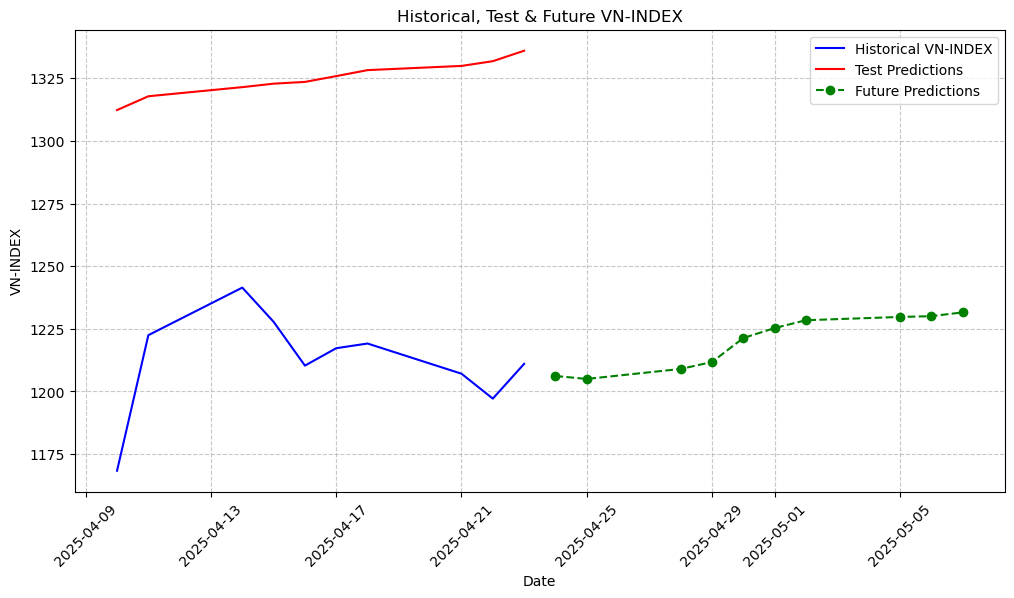

        Date  Predicted VN-INDEX  Predicted Change
0 2025-04-24         1206.159959         -0.003997
1 2025-04-25         1204.983481         -0.000975
2 2025-04-28         1208.974816          0.003312
3 2025-04-29         1211.735954          0.002284
4 2025-04-30         1221.319275          0.007909
5 2025-05-01         1225.286782          0.003249
6 2025-05-02         1228.423431          0.002560
7 2025-05-05         1229.730069          0.001064
8 2025-05-06         1230.037135          0.000250
9 2025-05-07         1231.545099          0.001226


In [9]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_1)

In [10]:
# 📂 Load dataset
file_path_2 = "../ready_data/change_external.csv"
df_2 = pd.read_csv(file_path_2)
df_2 = quicky_data(df_2)

60
(448, 60, 33)
torch.Size([447, 60, 33])
Epoch 1 - Loss: 80.63397496705875
Epoch 2 - Loss: 80.2818254865706
Epoch 3 - Loss: 79.9666261007078
Epoch 4 - Loss: 79.71476755291224
Epoch 5 - Loss: 79.24939294997603
Epoch 6 - Loss: 78.737182631623
Epoch 7 - Loss: 77.97481739707291
Epoch 8 - Loss: 77.13301390828565
Epoch 9 - Loss: 76.51014381833375
Epoch 10 - Loss: 75.76482350751758
Epoch 11 - Loss: 74.9477551523596
Epoch 12 - Loss: 74.16525891795754
Epoch 13 - Loss: 74.36499583628029
Epoch 14 - Loss: 74.63848957791924
Epoch 15 - Loss: 73.50685932580382
Epoch 16 - Loss: 73.19127511419356
Epoch 17 - Loss: 72.72863935213536
Epoch 18 - Loss: 73.35100875981152
Epoch 19 - Loss: 72.38792548608035
Epoch 20 - Loss: 73.6376703614369
Epoch 21 - Loss: 73.22484996076673
Epoch 22 - Loss: 71.39762281719595
Epoch 23 - Loss: 71.36924398038536
Epoch 24 - Loss: 70.50155377388
Epoch 25 - Loss: 69.29419110482559
Epoch 26 - Loss: 69.24836463667452
Epoch 27 - Loss: 69.3426406737417
Epoch 28 - Loss: 68.25109587702

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


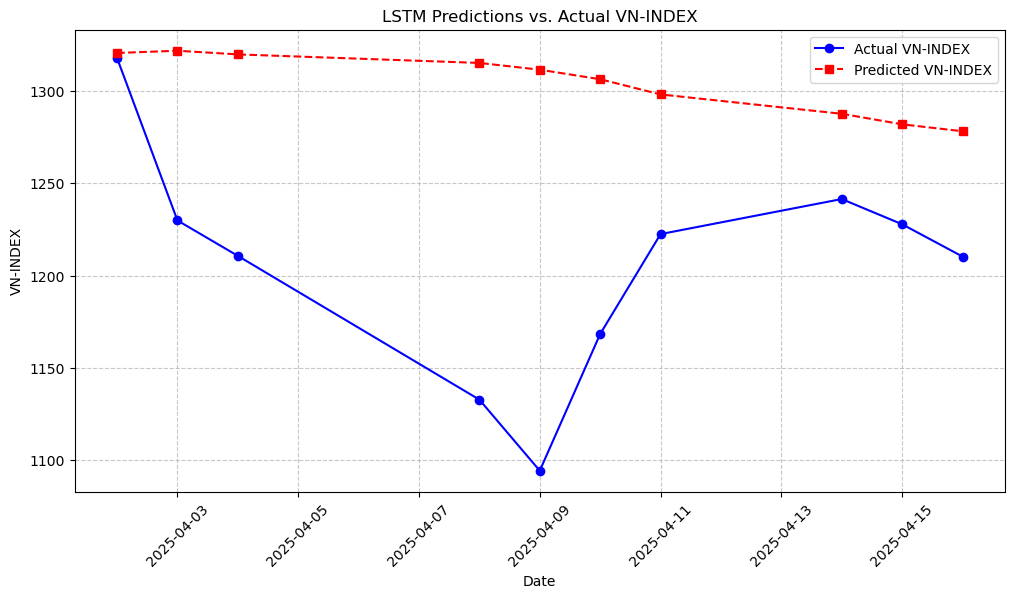

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-04-02          1317.83         1320.549498
1 2025-04-03          1229.84         1321.773693
2 2025-04-04          1210.67         1319.781885
3 2025-04-08          1132.79         1315.161913
4 2025-04-09          1094.30         1311.493193
5 2025-04-10          1168.34         1306.332007
6 2025-04-11          1222.46         1298.101358
7 2025-04-14          1241.44         1287.620435
8 2025-04-15          1227.79         1281.918897
9 2025-04-16          1210.30         1278.154793
Epoch 1 - Loss: 82.24601624393836
Epoch 2 - Loss: 81.92854657256976
Epoch 3 - Loss: 81.65855018654838
Epoch 4 - Loss: 81.41834300057963
Epoch 5 - Loss: 80.9772043209523
Epoch 6 - Loss: 80.37370927957818
Epoch 7 - Loss: 79.94662345806137
Epoch 8 - Loss: 79.17256228113547
Epoch 9 - Loss: 78.34349454659969
Epoch 10 - Loss: 77.51144176721573
Epoch 11 - Loss: 76.93328160792589
Epoch 12 - Loss: 76.4814887521788

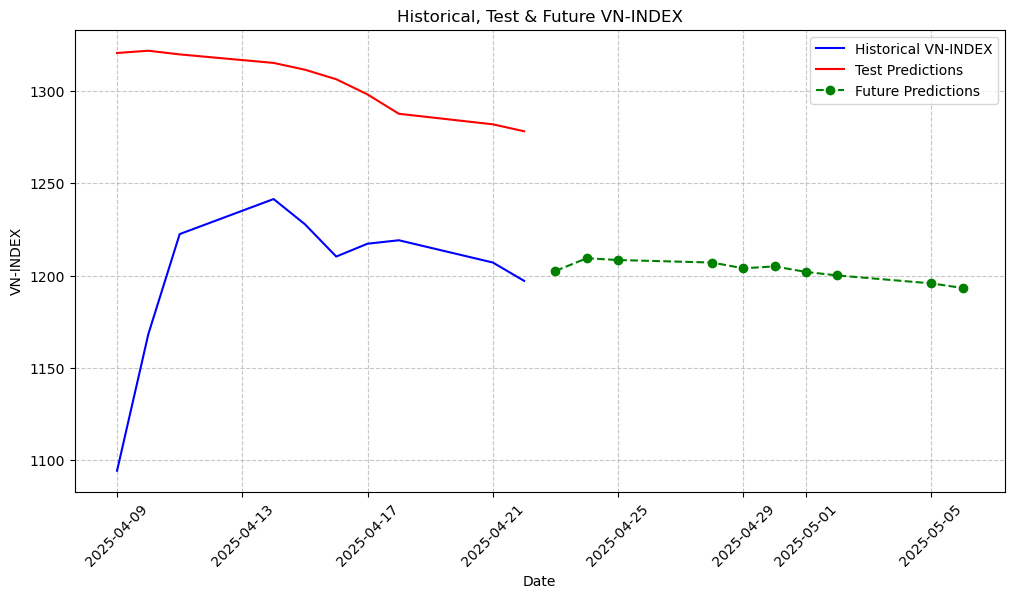

        Date  Predicted VN-INDEX  Predicted Change
0 2025-04-23         1202.508810          0.004493
1 2025-04-24         1209.388067          0.005721
2 2025-04-25         1208.407058         -0.000811
3 2025-04-28         1207.058922         -0.001116
4 2025-04-29         1203.939260         -0.002585
5 2025-04-30         1204.962169          0.000850
6 2025-05-01         1201.968004         -0.002485
7 2025-05-02         1200.068011         -0.001581
8 2025-05-05         1195.779779         -0.003573
9 2025-05-06         1193.280394         -0.002090


In [11]:
data = df_2

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_2, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_2)

60
(446, 60, 48)
torch.Size([445, 60, 48])
Epoch 1 - Loss: 79.56501021096483
Epoch 2 - Loss: 79.06170320091769
Epoch 3 - Loss: 78.62236802652478
Epoch 4 - Loss: 77.97451338497922
Epoch 5 - Loss: 77.185734027531
Epoch 6 - Loss: 76.00808286480606
Epoch 7 - Loss: 74.63793862611055
Epoch 8 - Loss: 73.48790904739872
Epoch 9 - Loss: 72.1325692650862
Epoch 10 - Loss: 71.09652503672987
Epoch 11 - Loss: 70.60009526461363
Epoch 12 - Loss: 70.20926137175411
Epoch 13 - Loss: 69.48206740617752
Epoch 14 - Loss: 68.45031952764839
Epoch 15 - Loss: 67.56097863055766
Epoch 16 - Loss: 66.80845729727298
Epoch 17 - Loss: 67.49971880856901
Epoch 18 - Loss: 68.18441882077605
Epoch 19 - Loss: 66.47240891773254
Epoch 20 - Loss: 65.62235573958606
Epoch 21 - Loss: 64.85352914314717
Epoch 22 - Loss: 64.29288225341588
Epoch 23 - Loss: 63.24582366272807
Epoch 24 - Loss: 64.86029596626759
Epoch 25 - Loss: 64.41708428785205
Epoch 26 - Loss: 63.93189388234168
Epoch 27 - Loss: 63.01620131265372
Epoch 28 - Loss: 63.3001

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


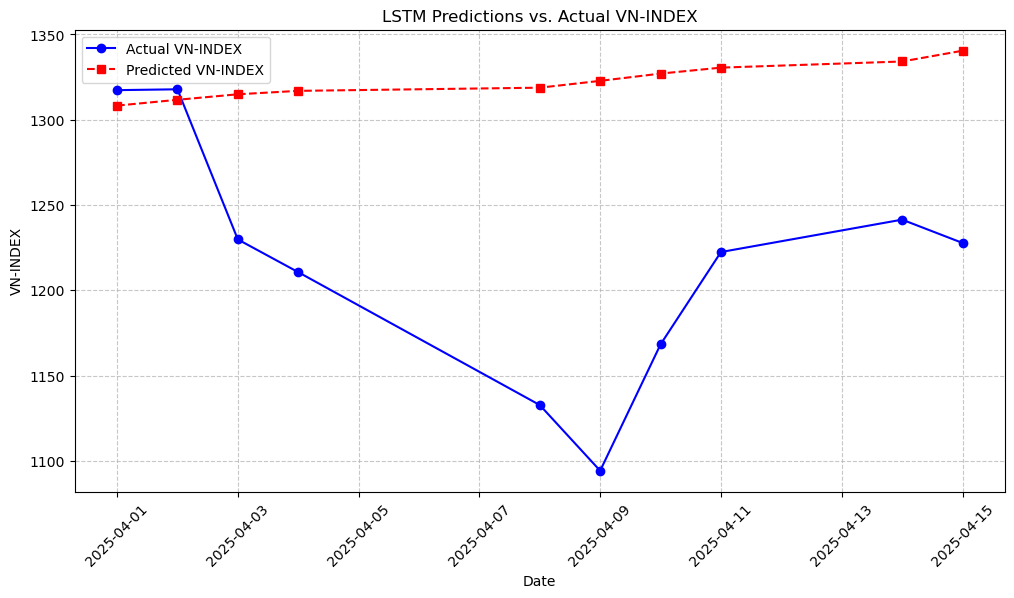

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-04-01          1317.33         1308.270299
1 2025-04-02          1317.83         1311.682680
2 2025-04-03          1229.84         1314.908970
3 2025-04-04          1210.67         1316.914893
4 2025-04-08          1132.79         1318.771671
5 2025-04-09          1094.30         1322.778758
6 2025-04-10          1168.34         1327.030906
7 2025-04-11          1222.46         1330.525858
8 2025-04-14          1241.44         1334.127462
9 2025-04-15          1227.79         1340.434285
Epoch 1 - Loss: 81.5989533206448


KeyboardInterrupt: 

In [12]:
data = lag_features_indicators(df_2, ['Change'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_2, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_2)

In [ ]:
data = lag_features_indicators(df_2, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_2, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_2)

In [ ]:
# 📂 Load dataset
file_path_3 = "../ready_data/change_merged.csv"
df_3 = pd.read_csv(file_path_3)
df_3 = quicky_data(df_3)

In [ ]:
data = df_3

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_3)

In [ ]:
data = lag_features_indicators(df_3, ['Change'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_3)

In [ ]:
data = lag_features_indicators(df_3, df_3.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_3)

In [ ]:
data = lag_features_indicators(df_3, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_3)

In [ ]:
data = lag_features_indicators(df_3, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=tuning)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10, df=df_3)